<a href="https://colab.research.google.com/github/CarlosCordova2023/Clase05_PythonIntermedio/blob/main/Clase05_PythonIntermedio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

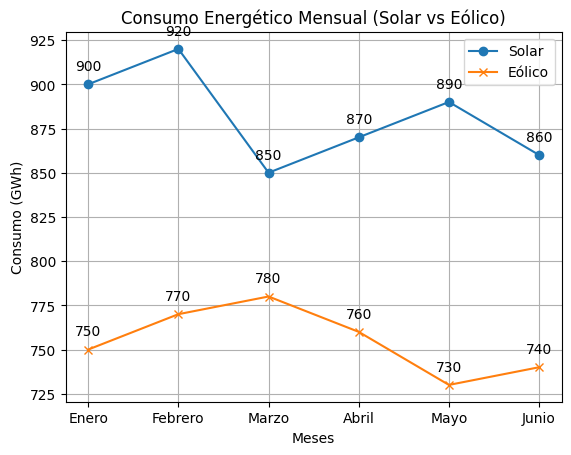

In [8]:
import matplotlib.pyplot as plt

# Datos de ejemplo de consumo energético (en GWh)
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
consumo_solar = [900, 920, 850, 870, 890, 860]
consumo_eolico = [750, 770, 780, 760, 730, 740]

# Gráfico de líneas
plt.plot(meses, consumo_solar, label='Solar', marker='o')
plt.plot(meses, consumo_eolico, label='Eólico', marker='x')

# Añadir anotaciones para los puntos de consumo solar
for i, valor in enumerate(consumo_solar):
    plt.annotate(f'{valor}', (meses[i], consumo_solar[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Añadir anotaciones para los puntos de consumo eólico
for i, valor in enumerate(consumo_eolico):
    plt.annotate(f'{valor}', (meses[i], consumo_eolico[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.title('Consumo Energético Mensual (Solar vs Eólico)')
plt.xlabel('Meses')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.grid(True)
plt.show()


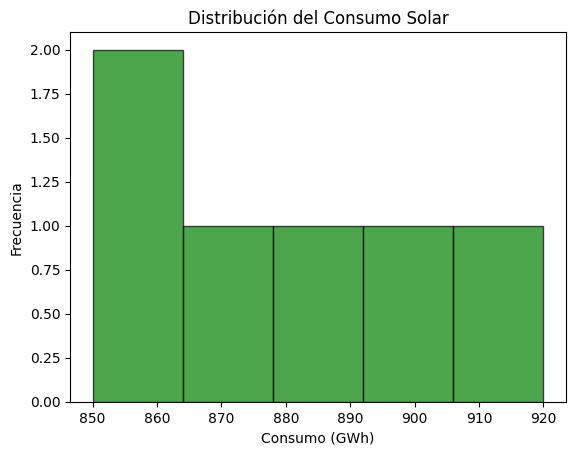

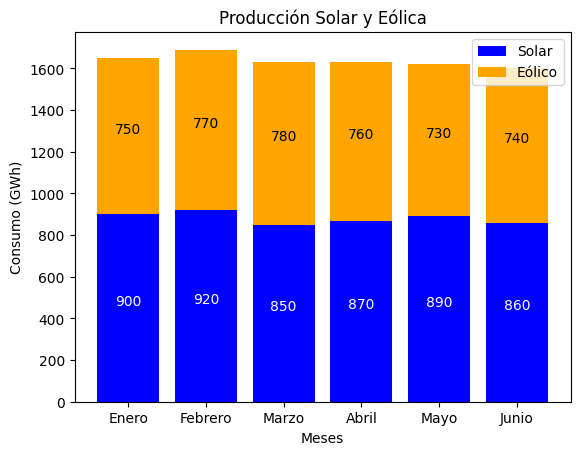

In [25]:
# Histograma de consumo energético
plt.hist(consumo_solar, bins=5, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribución del Consumo Solar')
plt.xlabel('Consumo (GWh)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras comparativo
plt.bar(meses, consumo_solar, color='blue', label='Solar')
plt.bar(meses, consumo_eolico, color='orange', bottom=consumo_solar, label='Eólico')


# Añadir valores a las barras de consumo solar
for i, valor in enumerate(consumo_solar):
    plt.text(meses[i], valor / 2, str(valor), ha='center', va='bottom', color='white')

# Añadir valores a las barras de consumo eólico
for i, valor in enumerate(consumo_eolico):
    plt.text(meses[i], consumo_solar[i] + valor / 2, str(valor), ha='center', va='bottom', color='black')





plt.title('Producción Solar y Eólica')
plt.xlabel('Meses')
plt.ylabel('Consumo (GWh)')
plt.legend()
plt.show()


In [19]:
import sqlite3

# Conectar a la base de datos (crea la base de datos si no existe)
conexion = sqlite3.connect('cne_energia.db')

# Crear un cursor para ejecutar comandos SQL
cursor = conexion.cursor()

# Crear una tabla de ejemplo
cursor.execute('''CREATE TABLE IF NOT EXISTS consumo_energetico (
                    id INTEGER PRIMARY KEY,
                    tipo_energia TEXT,
                    mes TEXT,
                    consumo INTEGER)''')

# Insertar datos de ejemplo
datos = [('Solar', 'Enero', 900), ('Eólico', 'Enero', 750)]
cursor.executemany('INSERT INTO consumo_energetico (tipo_energia, mes, consumo) VALUES (?, ?, ?)', datos)

# Guardar los cambios y cerrar la conexión
conexion.commit()
conexion.close()


In [20]:
import sqlite3

# Conectar a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Recuperar datos de la tabla
cursor.execute('SELECT * FROM consumo_energetico')
filas = cursor.fetchall()

# Mostrar los datos
for fila in filas:
    print(fila)

# Cerrar la conexión
conexion.close()


(1, 'Solar', 'Enero', 900)
(2, 'Eólico', 'Enero', 750)
(3, 'Solar', 'Enero', 900)
(4, 'Eólico', 'Enero', 750)


In [21]:
# Conectar a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Recuperar todos los datos de consumo
cursor.execute('SELECT * FROM consumo_energetico')
resultados = cursor.fetchall()

# Mostrar los resultados
for fila in resultados:
    print(fila)

conexion.close()


(1, 'Solar', 'Enero', 900)
(2, 'Eólico', 'Enero', 750)
(3, 'Hidráulica', 'Enero', 800)
(4, 'Solar', 'Febrero', 920)
(5, 'Eólico', 'Febrero', 770)
(6, 'Hidráulica', 'Febrero', 810)
(7, 'Solar', 'Marzo', 850)
(8, 'Eólico', 'Marzo', 780)
(9, 'Hidráulica', 'Marzo', 790)
(10, 'Solar', 'Abril', 870)
(11, 'Eólico', 'Abril', 760)
(12, 'Hidráulica', 'Abril', 820)
(13, 'Solar', 'Mayo', 890)
(14, 'Eólico', 'Mayo', 730)
(15, 'Hidráulica', 'Mayo', 850)
(16, 'Solar', 'Junio', 860)
(17, 'Eólico', 'Junio', 740)
(18, 'Hidráulica', 'Junio', 840)
(19, 'Solar', 'Julio', 880)
(20, 'Eólico', 'Julio', 760)
(21, 'Hidráulica', 'Julio', 830)
(22, 'Solar', 'Agosto', 920)
(23, 'Eólico', 'Agosto', 780)
(24, 'Hidráulica', 'Agosto', 840)
(25, 'Solar', 'Septiembre', 930)
(26, 'Eólico', 'Septiembre', 770)
(27, 'Hidráulica', 'Septiembre', 850)
(28, 'Solar', 'Octubre', 880)
(29, 'Eólico', 'Octubre', 750)
(30, 'Hidráulica', 'Octubre', 810)
(31, 'Solar', 'Noviembre', 910)
(32, 'Eólico', 'Noviembre', 760)
(33, 'Hidráulica'

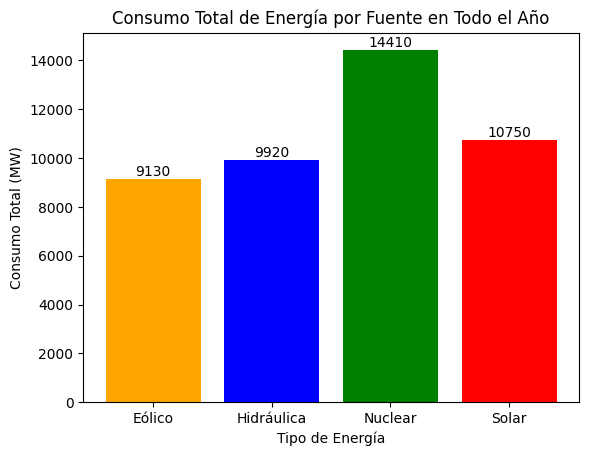

In [23]:
import sqlite3
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo total por tipo de energía
cursor.execute('SELECT tipo_energia, SUM(consumo) FROM consumo_energetico GROUP BY tipo_energia')
resultados = cursor.fetchall()

# Separar los resultados en listas
tipos = [row[0] for row in resultados]
consumos = [row[1] for row in resultados]

# Crear el gráfico de barras
plt.bar(tipos, consumos, color=['orange', 'blue', 'green', 'red'])

# Añadir valores a las barras
for i, valor in enumerate(consumos):
    plt.text(i, valor + 10, str(valor), ha='center', va='bottom')


plt.title('Consumo Total de Energía por Fuente en Todo el Año')
plt.xlabel('Tipo de Energía')
plt.ylabel('Consumo Total (MW)')
plt.show()

# Cerrar la conexión
conexion.close()


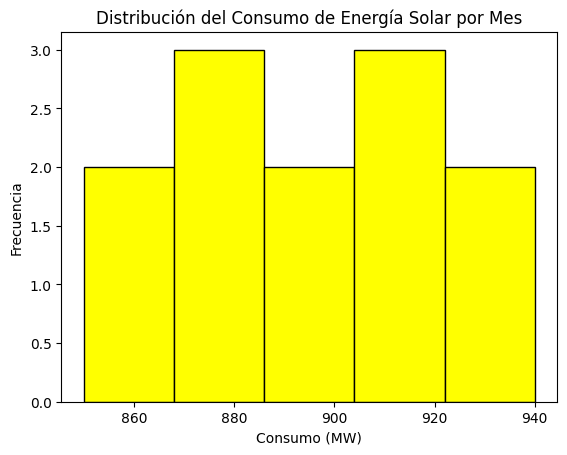

In [24]:
import sqlite3
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener los consumos de energía solar
cursor.execute("SELECT consumo FROM consumo_energetico WHERE tipo_energia = 'Solar'")
consumos_solar = [row[0] for row in cursor.fetchall()]

# Crear el histograma
plt.hist(consumos_solar, bins=5, color='yellow', edgecolor='black')
plt.title('Distribución del Consumo de Energía Solar por Mes')
plt.xlabel('Consumo (MW)')
plt.ylabel('Frecuencia')
plt.show()

# Cerrar la conexión
conexion.close()


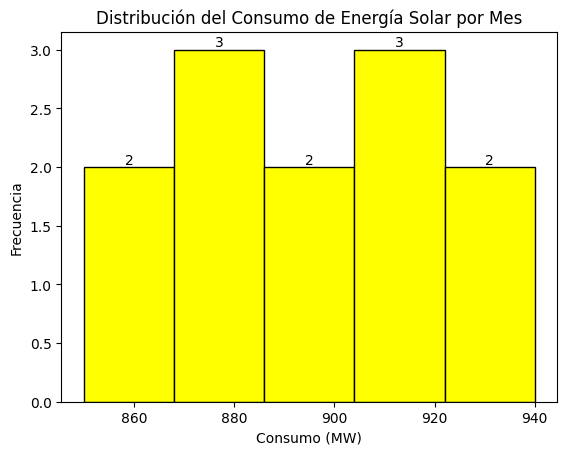

In [26]:
import sqlite3
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener los consumos de energía solar
cursor.execute("SELECT consumo FROM consumo_energetico WHERE tipo_energia = 'Solar'")
consumos_solar = [row[0] for row in cursor.fetchall()]

# Crear el histograma
n, bins, patches = plt.hist(consumos_solar, bins=5, color='yellow', edgecolor='black')

# Añadir valores a los bins
for i in range(len(patches)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.title('Distribución del Consumo de Energía Solar por Mes')
plt.xlabel('Consumo (MW)')
plt.ylabel('Frecuencia')
plt.show()

# Cerrar la conexión
conexion.close()


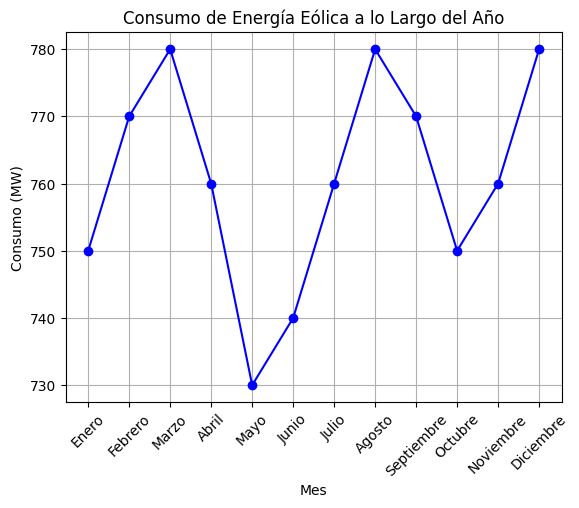

In [27]:
import sqlite3
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo de energía eólica por mes
cursor.execute("SELECT mes, consumo FROM consumo_energetico WHERE tipo_energia = 'Eólico'")
resultados = cursor.fetchall()

# Ordenar los resultados para asegurar la secuencia de los meses
meses = [row[0] for row in resultados]
consumos = [row[1] for row in resultados]

# Crear la gráfica de línea
plt.plot(meses, consumos, marker='o', color='blue')
plt.title('Consumo de Energía Eólica a lo Largo del Año')
plt.xlabel('Mes')
plt.ylabel('Consumo (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Cerrar la conexión
conexion.close()


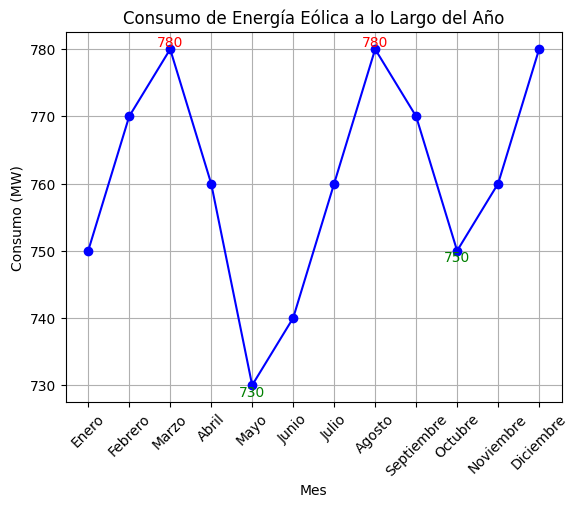

In [29]:
import sqlite3
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo de energía eólica por mes
cursor.execute("SELECT mes, consumo FROM consumo_energetico WHERE tipo_energia = 'Eólico'")
resultados = cursor.fetchall()

# Ordenar los resultados para asegurar la secuencia de los meses
meses = [row[0] for row in resultados]
consumos = [row[1] for row in resultados]

# Encontrar picos y valles
picos, _ = find_peaks(consumos)
valles, _ = find_peaks([-x for x in consumos])

# Crear la gráfica de línea
plt.plot(meses, consumos, marker='o', color='blue')

# Añadir valores a los picos
for pico in picos:
    plt.text(meses[pico], consumos[pico], f'{consumos[pico]}', ha='center', va='bottom', color='red')

# Añadir valores a los valles
for valle in valles:
    plt.text(meses[valle], consumos[valle], f'{consumos[valle]}', ha='center', va='top', color='green')

plt.title('Consumo de Energía Eólica a lo Largo del Año')
plt.xlabel('Mes')
plt.ylabel('Consumo (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Cerrar la conexión
conexion.close()



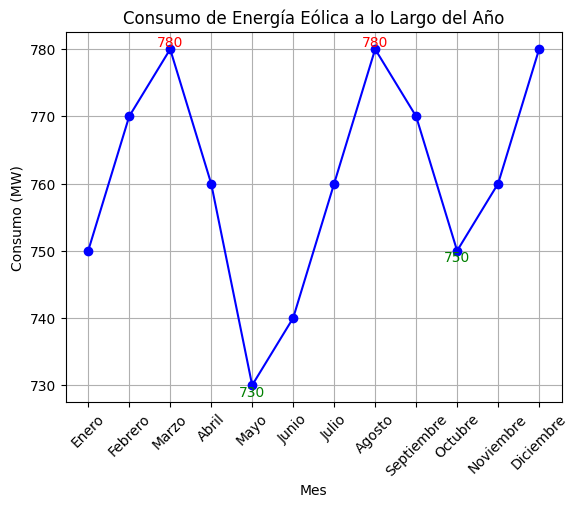

In [30]:
import sqlite3
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo de energía eólica por mes
cursor.execute("SELECT mes, consumo FROM consumo_energetico WHERE tipo_energia = 'Eólico'")
resultados = cursor.fetchall()

# Ordenar los resultados para asegurar la secuencia de los meses
meses = [row[0] for row in resultados]
consumos = [row[1] for row in resultados]

# Encontrar picos y valles
picos, _ = find_peaks(consumos)
valles, _ = find_peaks([-x for x in consumos])

# Crear la gráfica de línea
plt.plot(meses, consumos, marker='o', color='blue')

# Añadir valores a los picos
for pico in picos:
    plt.text(meses[pico], consumos[pico], f'{consumos[pico]}', ha='center', va='bottom', color='red')

# Añadir valores a los valles
for valle in valles:
    plt.text(meses[valle], consumos[valle], f'{consumos[valle]}', ha='center', va='top', color='green')

plt.title('Consumo de Energía Eólica a lo Largo del Año')
plt.xlabel('Mes')
plt.ylabel('Consumo (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Cerrar la conexión
conexion.close()


In [31]:
import sqlite3

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo promedio por tipo de energía
cursor.execute('SELECT tipo_energia, AVG(consumo) FROM consumo_energetico GROUP BY tipo_energia')
resultados = cursor.fetchall()

# Imprimir los resultados
for tipo, promedio in resultados:
    print(f"El consumo promedio de {tipo} es: {promedio:.2f} MW")

# Cerrar la conexión
conexion.close()


El consumo promedio de Eólico es: 760.83 MW
El consumo promedio de Hidráulica es: 826.67 MW
El consumo promedio de Nuclear es: 1200.83 MW
El consumo promedio de Solar es: 895.83 MW


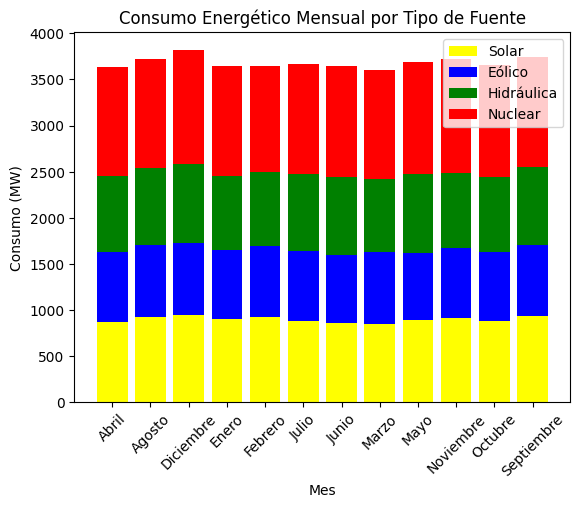

In [32]:
import sqlite3
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo de cada tipo de energía por mes
cursor.execute('SELECT mes, SUM(CASE WHEN tipo_energia = "Solar" THEN consumo ELSE 0 END),'
               'SUM(CASE WHEN tipo_energia = "Eólico" THEN consumo ELSE 0 END),'
               'SUM(CASE WHEN tipo_energia = "Hidráulica" THEN consumo ELSE 0 END),'
               'SUM(CASE WHEN tipo_energia = "Nuclear" THEN consumo ELSE 0 END) FROM consumo_energetico GROUP BY mes')
resultados = cursor.fetchall()

# Extraer los datos por categoría
meses = [row[0] for row in resultados]
solar = [row[1] for row in resultados]
eolico = [row[2] for row in resultados]
hidraulica = [row[3] for row in resultados]
nuclear = [row[4] for row in resultados]

# Crear el gráfico de barras apiladas
plt.bar(meses, solar, color='yellow', label='Solar')
plt.bar(meses, eolico, bottom=solar, color='blue', label='Eólico')
plt.bar(meses, hidraulica, bottom=[i+j for i,j in zip(solar, eolico)], color='green', label='Hidráulica')
plt.bar(meses, nuclear, bottom=[i+j+k for i,j,k in zip(solar, eolico, hidraulica)], color='red', label='Nuclear')

plt.title('Consumo Energético Mensual por Tipo de Fuente')
plt.xlabel('Mes')
plt.ylabel('Consumo (MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Cerrar la conexión
conexion.close()


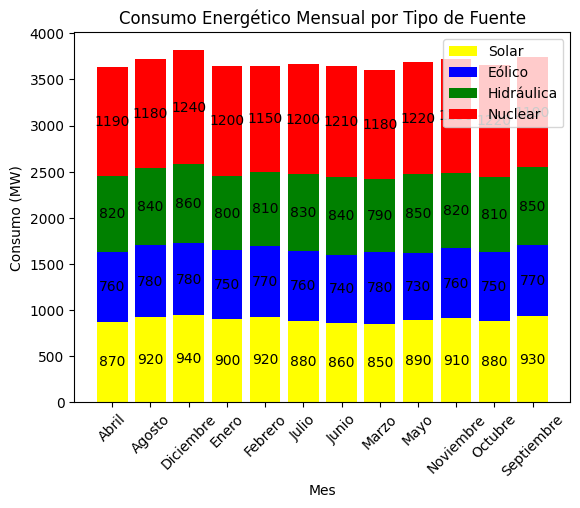

In [33]:
import sqlite3
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = sqlite3.connect('cne_energia.db')
cursor = conexion.cursor()

# Consulta para obtener el consumo de cada tipo de energía por mes
cursor.execute('SELECT mes, SUM(CASE WHEN tipo_energia = "Solar" THEN consumo ELSE 0 END),'
               'SUM(CASE WHEN tipo_energia = "Eólico" THEN consumo ELSE 0 END),'
               'SUM(CASE WHEN tipo_energia = "Hidráulica" THEN consumo ELSE 0 END),'
               'SUM(CASE WHEN tipo_energia = "Nuclear" THEN consumo ELSE 0 END) FROM consumo_energetico GROUP BY mes')
resultados = cursor.fetchall()

# Extraer los datos por categoría
meses = [row[0] for row in resultados]
solar = [row[1] for row in resultados]
eolico = [row[2] for row in resultados]
hidraulica = [row[3] for row in resultados]
nuclear = [row[4] for row in resultados]

# Crear el gráfico de barras apiladas
plt.bar(meses, solar, color='yellow', label='Solar')
plt.bar(meses, eolico, bottom=solar, color='blue', label='Eólico')
plt.bar(meses, hidraulica, bottom=[i+j for i,j in zip(solar, eolico)], color='green', label='Hidráulica')
plt.bar(meses, nuclear, bottom=[i+j+k for i,j,k in zip(solar, eolico, hidraulica)], color='red', label='Nuclear')

# Añadir valores a las barras
for i in range(len(meses)):
    plt.text(i, solar[i] / 2, str(solar[i]), ha='center', va='center', color='black')
    plt.text(i, solar[i] + eolico[i] / 2, str(eolico[i]), ha='center', va='center', color='black')
    plt.text(i, solar[i] + eolico[i] + hidraulica[i] / 2, str(hidraulica[i]), ha='center', va='center', color='black')
    plt.text(i, solar[i] + eolico[i] + hidraulica[i] + nuclear[i] / 2, str(nuclear[i]), ha='center', va='center', color='black')

plt.title('Consumo Energético Mensual por Tipo de Fuente')
plt.xlabel('Mes')
plt.ylabel('Consumo (MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Cerrar la conexión
conexion.close()


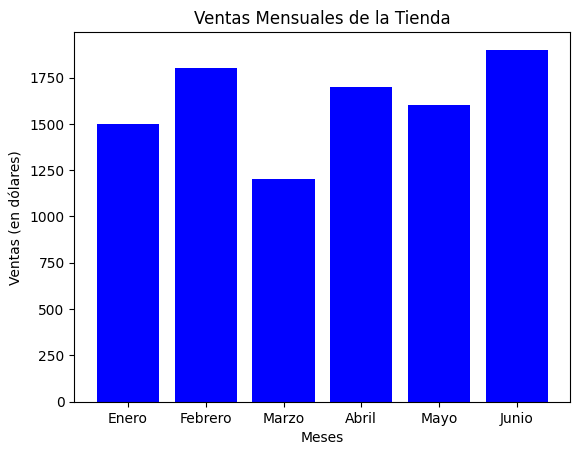

In [34]:
import matplotlib.pyplot as plt

# Datos de ventas mensuales
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
ventas = [1500, 1800, 1200, 1700, 1600, 1900]

# Crear el gráfico de barras
plt.bar(meses, ventas, color='blue')

# Añadir título y etiquetas
plt.title('Ventas Mensuales de la Tienda')
plt.xlabel('Meses')
plt.ylabel('Ventas (en dólares)')

# Mostrar el gráfico
plt.show()

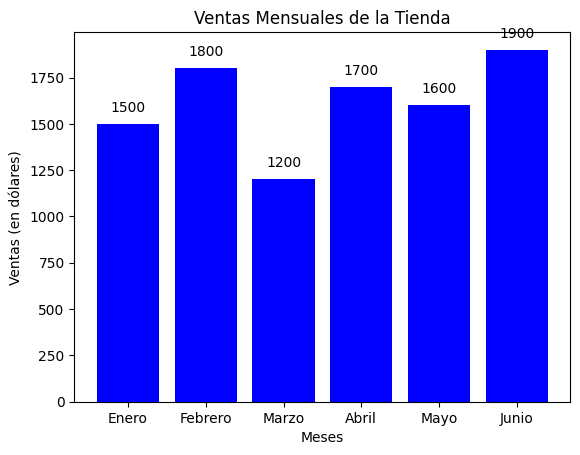

In [35]:
import matplotlib.pyplot as plt

# Datos de ventas mensuales
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
ventas = [1500, 1800, 1200, 1700, 1600, 1900]

# Crear el gráfico de barras
plt.bar(meses, ventas, color='blue')

# Añadir valores a las barras
for i, valor in enumerate(ventas):
    plt.text(i, valor + 50, str(valor), ha='center', va='bottom', color='black')

# Añadir título y etiquetas
plt.title('Ventas Mensuales de la Tienda')
plt.xlabel('Meses')
plt.ylabel('Ventas (en dólares)')

# Mostrar el gráfico
plt.show()


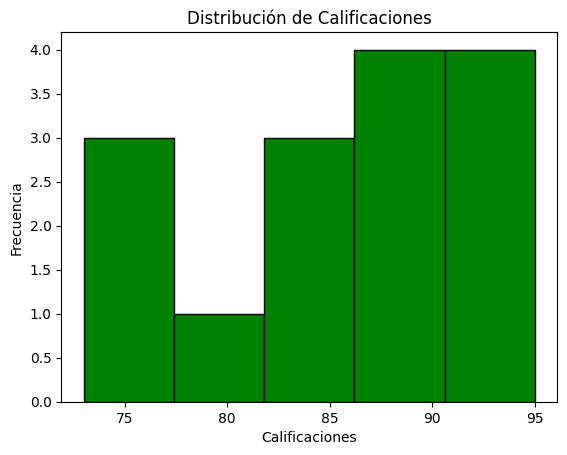

In [39]:
import matplotlib.pyplot as plt

# Datos de calificaciones
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 84, 91, 73, 87, 94, 77, 82]

# Crear el histograma
plt.hist(calificaciones, bins=5, color='green', edgecolor='black')





# Añadir título y etiquetas
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

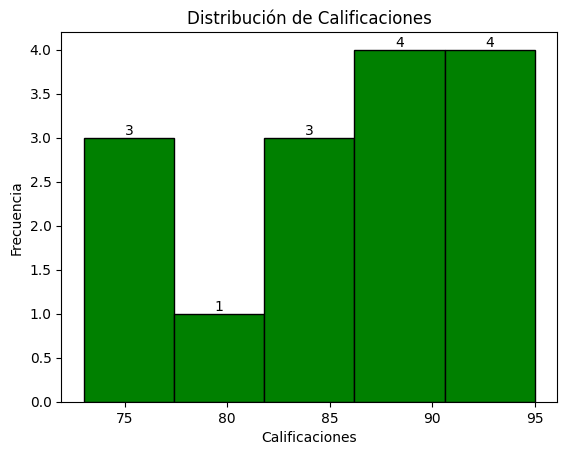

In [40]:
import matplotlib.pyplot as plt

# Datos de calificaciones
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 84, 91, 73, 87, 94, 77, 82]

# Crear el histograma
n, bins, patches = plt.hist(calificaciones, bins=5, color='green', edgecolor='black')

# Añadir valores a los bins
for i in range(len(patches)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [42]:
import sqlite3

# Conectar a la base de datos (o crearla si no existe)
conexion = sqlite3.connect('tienda.db')

# Crear un cursor
cursor = conexion.cursor()

# Crear una tabla
cursor.execute('''
CREATE TABLE IF NOT EXISTS ventas (
    id INTEGER PRIMARY KEY,
    producto TEXT,
    cantidad INTEGER,
    precio REAL
)
''')

# Insertar algunos registros de ejemplo
cursor.execute("INSERT INTO ventas (producto, cantidad, precio) VALUES ('Producto A', 10, 9.99)")
cursor.execute("INSERT INTO ventas (producto, cantidad, precio) VALUES ('Producto B', 5, 19.99)")
cursor.execute("INSERT INTO ventas (producto, cantidad, precio) VALUES ('Producto C', 20, 4.99)")

# Guardar los cambios
conexion.commit()

# Realizar una consulta para obtener los datos
cursor.execute("SELECT * FROM ventas")
registros = cursor.fetchall()

# Mostrar los datos obtenidos
for registro in registros:
    print(registro)

# Cerrar la conexión
conexion.close()

(1, 'Producto A', 10, 9.99)
(2, 'Producto B', 5, 19.99)
(3, 'Producto C', 20, 4.99)
(4, 'Producto A', 10, 9.99)
(5, 'Producto B', 5, 19.99)
(6, 'Producto C', 20, 4.99)
